In [7]:
 from google.cloud import bigquery
 from google.oauth2 import service_account
 import pandas as pd

 # 🔐 Path to your service account key
 SERVICE_ACCOUNT_FILE = "gothic-well-464310-i6-18eef1365e24.json"

 # 📁 Your GCP project ID
 PROJECT_ID = "gothic-well-464310-i6"

 # 🧾 Create credentials and client
 credentials = service_account.Credentials.from_service_account_file(
     SERVICE_ACCOUNT_FILE
 )
 client = bigquery.Client(credentials=credentials, project=PROJECT_ID)

 # 🔍 Example SQL query
 query = """
     SELECT * 
     FROM `gothic-well-464310-i6.imdb.reviews` 
     LIMIT 10
 """

 # 🚀 Run query and convert to DataFrame
 df = client.query(query).to_dataframe()

 # 🖨️ Print the DataFrame
 print(df)

                                              review split     label  \
0  Once again Mr. Costner has dragged out a movie...  test  Negative   
1  This is an example of why the majority of acti...  test  Negative   
2  First of all I hate those moronic rappers, who...  test  Negative   
3  Not even the Beatles could write songs everyon...  test  Negative   
4  Brass pictures (movies is not a fitting word f...  test  Negative   
5  A funny thing happened to me while watching "M...  test  Negative   
6  This German horror film has to be one of the w...  test  Negative   
7  Being a long-time fan of Japanese film, I expe...  test  Negative   
8  "Tokyo Eyes" tells of a 17 year old Japanese g...  test  Negative   
9  Wealthy horse ranchers in Buenos Aires have a ...  test  Negative   

    movie_id  reviewer_rating                             movie_url  \
0  tt0406816                2  http://www.imdb.com/title/tt0406816/   
1  tt0105636                4  http://www.imdb.com/title/tt010563

In [19]:
# 构造一个只取前 10 行的查询
query = """
SELECT
  *
FROM `gothic-well-464310-i6.imdb.title_ratings`
LIMIT 10
"""

# 执行并转成 DataFrame
df_sample = client.query(query).to_dataframe()

# 直接打印
print(df_sample)


      tconst  average_rating  num_votes
0  tt0000024             3.7        165
1  tt0000025             4.1         51
2  tt0000036             4.4        657
3  tt0000037             4.4         79
4  tt0000038             4.1        237
5  tt0000040             4.2         81
6  tt0000044             4.0         55
7  tt0000052             4.1        125
8  tt0000076             4.4        588
9  tt0000078             3.5        113


In [32]:
# # 构造一个只取前 10 行的查询
# query = """
# SELECT
#   *
# FROM `gothic-well-464310-i6.imdb.title_basics`
# LIMIT 10
# """

# # 执行并转成 DataFrame
# df_sample = client.query(query).to_dataframe()

# # 直接打印
# print(df_sample)

Movie Performance Analytics
Use Case: Identify top-performing movies or TV shows based on user ratings.
Example Questions:
What are the top 10 highest-rated movies of all time with more than 10,000 votes?
Which genres have the highest average ratings over the past decade?

In [18]:
# 1. 查询：历史上评分最高且投票数超过 10,000 的前 10 部电影
query_top10 = """
SELECT
  *
FROM `gothic-well-464310-i6.imdb.title_ratings`
WHERE
  num_votes > 10000
ORDER BY
  average_rating DESC
LIMIT 10
"""

df_top10 = client.query(query_top10).to_dataframe()
print("Top 10 highest‑rated movies (votes > 10,000):")
print(df_top10)


Top 10 highest‑rated movies (votes > 10,000):
       tconst  average_rating  num_votes
0   tt2301451            10.0     253502
1  tt21151974             9.9      40423
2   tt2178784             9.9     131880
3  tt11028174             9.9      26266
4  tt12187040             9.9      66299
5   tt2301455             9.9     161476
6   tt0701989             9.9      14288
7   tt1683088             9.9      87686
8   tt1204265             9.9      20433
9  tt11294360             9.9      25024


In [27]:
# top_genres = f"""
# SELECT
#   tb.title_type AS title,
#   tr.average_rating AS rating,
#   tr.num_votes AS votes
# FROM `gothic-well-464310-i6.imdb.title_ratings` AS tr
# JOIN `gothic-well-464310-i6.imdb.title_basics`  AS tb
#   ON tr.tconst = tb.tconst
# WHERE
#   tr.num_votes > 10000
# ORDER BY
#   tr.average_rating DESC
# LIMIT 1
# """

# top_genres = client.query(top_genres).to_dataframe()
# print(top_genres)

In [28]:
top_genres = f"""
SELECT
  tb.title_type
FROM `gothic-well-464310-i6.imdb.title_ratings` AS tr
JOIN `gothic-well-464310-i6.imdb.title_basics`  AS tb
  ON tr.tconst = tb.tconst
WHERE
  tr.num_votes > 10000
ORDER BY
  tr.average_rating DESC
LIMIT 1
"""

top_genres = client.query(top_genres).to_dataframe()
print(top_genres)

  title_type
0  tvEpisode


Talent & Cast Insights
Use Case: Analyze the careers and contributions of actors, directors, and writers.
Example Questions:
Which actor has appeared in the highest number of top-rated movies?
Which directors consistently produce highly-rated content?
Who are the most prolific actors in a specific genre (e.g., comedy)?

哪位演员在评分最高的电影中出演次数最多？

哪些导演持续制作高评分的作品？

在特定类型（例如喜剧）中，哪些演员作品产出最多？

In [43]:
# # 构造一个只取前 10 行的查询
# query = """
# SELECT
#   *
# FROM `gothic-well-464310-i6.imdb.title_ratings`
# LIMIT 10
# """

# # 执行并转成 DataFrame
# df_sample = client.query(query).to_dataframe()

# # 直接打印
# print(df_sample)

In [42]:
# # 构造一个只取前 10 行的查询
# query = """
# SELECT
#   *
# FROM `gothic-well-464310-i6.imdb.name_basics`
# LIMIT 10
# """

# # 执行并转成 DataFrame
# df_sample = client.query(query).to_dataframe()

# # 直接打印
# print(df_sample)

In [41]:
# # 构造一个只取前 10 行的查询
# query = """
# SELECT
#   *
# FROM `gothic-well-464310-i6.imdb.title_principals`
# LIMIT 10
# """

# # 执行并转成 DataFrame
# df_sample = client.query(query).to_dataframe()

# # 直接打印
# print(df_sample)

In [44]:
# 先取前 100 部评分最高的电影，再统计演员/女演员出镜次数最多的情况,再对应到人名 打印出来
query_top_actor = f"""
SELECT
  nb.primary_name   AS actor,
  COUNT(*)         AS appearances
FROM (
  SELECT
    tconst
  FROM `gothic-well-464310-i6.imdb.title_ratings`
  ORDER BY
    average_rating DESC
  LIMIT 100
) AS top100
JOIN `gothic-well-464310-i6.imdb.title_principals` AS tp
  ON top100.tconst = tp.tconst
JOIN `gothic-well-464310-i6.imdb.name_basics`    AS nb
  ON tp.nconst    = nb.nconst
WHERE
  tp.category IN ('actor', 'actress')
GROUP BY
  nb.primary_name
ORDER BY
  appearances DESC
LIMIT 1
"""

df_top_actor = client.query(query_top_actor).to_dataframe()
print("在前 100 部最高评分电影中，出镜次数最多的演员：")
print(df_top_actor)

在前 100 部最高评分电影中，出镜次数最多的演员：
            actor  appearances
0  Sumbul Touqeer           11


In [49]:
# query = """
# SELECT
#   d AS director,
#   ROUND(AVG(tr.average_rating), 2) AS avg_rating
# FROM `bigquery-public-data.imdb.title_crew` AS tc
# JOIN `bigquery-public-data.imdb.title_ratings` AS tr
#   ON tc.tconst = tr.tconst,
#   UNNEST(SPLIT(tc.directors, ',')) AS d
# GROUP BY
#   director
# ORDER BY
#   avg_rating DESC
# LIMIT 10
# """

# df = client.query(query).to_dataframe()
# print(df)

In [52]:
# query = """
# SELECT
#   nb.primary_name    AS director_name,               -- 导演姓名
#   ROUND(AVG(tr.average_rating), 2) AS avg_rating    -- 平均评分
# FROM `bigquery-public-data.imdb.title_crew`   AS tc
# JOIN `bigquery-public-data.imdb.title_ratings` AS tr
#   ON tc.tconst = tr.tconst,
# UNNEST(SPLIT(tc.directors, ','))            AS d     -- 拆分出的导演 nconst
# JOIN `bigquery-public-data.imdb.name_basics` AS nb
#   ON nb.nconst = d                               -- 关联到姓名表
# GROUP BY
#   director_name
# ORDER BY
#   avg_rating DESC
# LIMIT 10
# """

# df = client.query(query).to_dataframe()
# print(df)


In [57]:
query = """
SELECT
  names.primary_name AS director_name,    -- 导演姓名
  ROUND(AVG(ratings.average_rating), 2) AS avg_rating       -- 计算平均 IMDb 评分，保留两位小数
FROM `gothic-well-464310-i6.imdb.title_crew`   AS crew
CROSS JOIN UNNEST(SPLIT(crew.directors, ',')) AS director_id  -- 拆分导演列表
JOIN `gothic-well-464310-i6.imdb.title_ratings` AS ratings
  ON crew.tconst = ratings.tconst           -- 把导演作品和评分关联起来
JOIN `gothic-well-464310-i6.imdb.name_basics` AS names
  ON names.nconst = director_id            -- 把导演 ID 映射成姓名
GROUP BY
  director_name                            -- 按导演分组
ORDER BY
  avg_rating DESC                          -- 按平均评分降序排列
LIMIT 10                                   -- 只取前 10 名
"""
df = client.query(query).to_dataframe()
print(df)


      director_name  avg_rating
0       Will Garber        10.0
1       Frank Kiper        10.0
2      Wayne Nelson        10.0
3       Noha Wassif        10.0
4   Brandon Windish        10.0
5     Toti Logronio        10.0
6       Aaron Singh        10.0
7    Guy Hodgkinson        10.0
8  Derek G. Turesky        10.0
9       Nathan Bell        10.0


In [59]:
# query = f"""
# WITH actor_genre_counts AS (
#   SELECT
#     genre,
#     nb.primary_name AS actor,
#     COUNT(*)        AS appearances
#   FROM `bigquery-public-data.imdb.title_basics` AS tb
#   CROSS JOIN UNNEST(SPLIT(tb.genres, ',')) AS genre
#   JOIN `gothic-well-464310-i6.imdb.title_principals` AS tp
#     ON tb.tconst = tp.tconst
#   JOIN `gothic-well-464310-i6.imdb.name_basics`    AS nb
#     ON tp.nconst = nb.nconst
#   WHERE tp.category IN ('actor','actress')
#   GROUP BY genre, actor
# )
# SELECT
#   genre,
#   actor,
#   appearances
# FROM (
#   SELECT
#     *,
#     ROW_NUMBER() OVER (
#       PARTITION BY genre 
#       ORDER BY appearances DESC
#     ) AS rn
#   FROM actor_genre_counts
# )
# WHERE rn = 1
# ORDER BY genre
# """

# # 执行并展示结果
# df = client.query(query).to_dataframe()
# print("每个类型中出镜次数最多的演员：")
# print(df)

In [62]:
query = f"""
SELECT
  genre,
  nb.primary_name AS actor,
  COUNT(*)         AS appearances
FROM `bigquery-public-data.imdb.title_basics` AS tb,
UNNEST(SPLIT(tb.genres, ',')) AS genre               -- 拆分类型列表
JOIN `gothic-well-464310-i6.imdb.title_principals` AS tp
  ON tp.tconst = tb.tconst
JOIN `gothic-well-464310-i6.imdb.name_basics` AS nb
  ON nb.nconst = tp.nconst
WHERE
  tp.category IN ('actor','actress')                 -- 只看演员/女演员
GROUP BY
  genre, actor                                       -- 按 (类型, 演员) 分组
QUALIFY
  ROW_NUMBER() OVER (PARTITION BY genre ORDER BY appearances DESC) = 1  -- 每个类型中只保留第一名
ORDER BY
  genre;                                             -- 按类型排序，方便查看
"""

# 执行并展示结果
df = client.query(query).to_dataframe()
print("每个类型中出镜次数最多的演员：")
print(df)

每个类型中出镜次数最多的演员：
          genre               actor  appearances
0        Action           Vic Sotto         9974
1         Adult          Jim Hunter         4495
2     Adventure    Manuela do Monte         7437
3     Animation   Dee Bradley Baker         8993
4     Biography      Sumit Pusavale         1845
5        Comedy           Vic Sotto        10640
6         Crime       Sushant Singh         5192
7   Documentary        Kazue Komiya         1565
8         Drama     Sameera Sherief         9634
9        Family           Vic Sotto         9960
10      Fantasy           Raj Premi         3513
11    Film-Noir     Humphrey Bogart           25
12    Game-Show     Aadesh Bandekar         5406
13      History          Amol Kolhe         1560
14       Horror          Nithya Ram         1914
15        Music      Thomas Sanders         3152
16      Musical        Mark Simpson         4509
17      Mystery           Ann Flood         3556
18         News       Félix Álvarez         2496
19  

Genre Trends and Popularity
Use Case: Explore how genres have evolved over time in terms of popularity and quality.
Example Questions:
How has the popularity of the “sci-fi” genre changed over the last 50 years?
Which genres consistently receive high average ratings?
What is the most common runtime for movies in each genre?

In [73]:
# # 构造一个只取前 10 行的查询
# query = """
# SELECT
#   *
# FROM `gothic-well-464310-i6.imdb.title_basics`
# LIMIT 10
# """

# # 执行并转成 DataFrame
# df_sample = client.query(query).to_dataframe()

# # 直接打印
# print(df_sample)

In [74]:
import matplotlib.pyplot as plt
query = """
SELECT
  year,
  COUNT(*) AS num_titles
FROM (
  SELECT
    tb.start_year AS year
  FROM `gothic-well-464310-i6.imdb.title_basics` AS tb,
  UNNEST(SPLIT(tb.genres, ',')) AS genre
  WHERE
    genre = 'Sci-Fi'
    AND tb.start_year BETWEEN 1975 AND EXTRACT(YEAR FROM CURRENT_DATE())
)
GROUP BY year
ORDER BY year
"""
df = client.query(query).to_dataframe()
print(df)

    year  num_titles
0   1975         333
1   1976         502
2   1977         417
3   1978         431
4   1979         505
5   1980         421
6   1981         495
7   1982         387
8   1983         448
9   1984         572
10  1985         487
11  1986         458
12  1987         480
13  1988         501
14  1989         631
15  1990         659
16  1991         676
17  1992         685
18  1993         657
19  1994         791
20  1995         729
21  1996         760
22  1997         751
23  1998         923
24  1999         833
25  2000         933
26  2001        1110
27  2002        1196
28  2003        1056
29  2004        1203
30  2005        1403
31  2006        1350
32  2007        1591
33  2008        1879
34  2009        2463
35  2010        2877
36  2011        3342
37  2012        4332
38  2013        5068
39  2014        5096
40  2015        4796
41  2016        5311
42  2017        5908
43  2018        5964
44  2019        5445
45  2020        5252
46  2021     

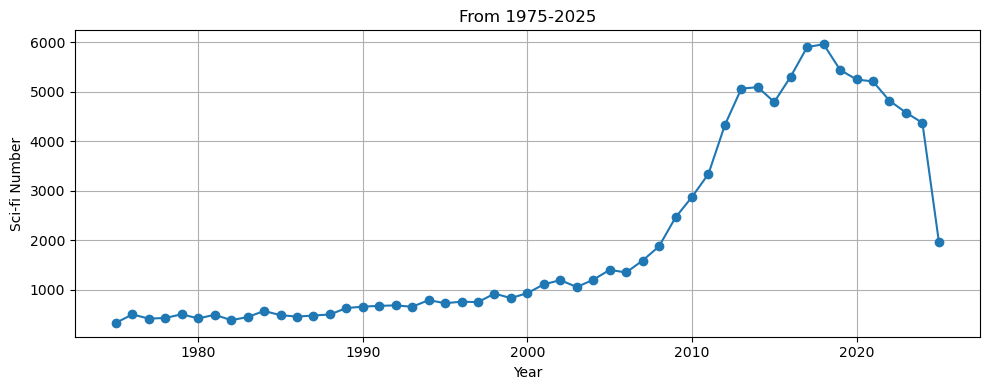

In [75]:
plt.figure(figsize=(10, 4))
plt.plot(df['year'], df['num_titles'], marker='o')
plt.title('From 1975-2025')
plt.xlabel('Year')
plt.ylabel('Sci-fi Number')
plt.grid(True)
plt.tight_layout()
plt.show()

Which genres consistently receive high average ratings?

In [86]:
# # 构造一个只取前 10 行的查询
# query = """
# SELECT
#   *
# FROM `gothic-well-464310-i6.imdb.title_basics`
# LIMIT 10
# """

# # 执行并转成 DataFrame
# df_sample = client.query(query).to_dataframe()

# # 直接打印
# print(df_sample)

In [83]:
# # 构造一个只取前 10 行的查询
# query = """
# SELECT
#   *
# FROM `gothic-well-464310-i6.imdb.title_ratings`
# LIMIT 10
# """

# # 执行并转成 DataFrame
# df_sample = client.query(query).to_dataframe()

# # 直接打印
# print(df_sample)

In [82]:
query = """
SELECT
  genre,
  ROUND(AVG(r.average_rating), 2) AS avg_rating,
  COUNT(1)                     AS title_count
FROM `gothic-well-464310-i6.imdb.title_basics` AS tb,
UNNEST(SPLIT(tb.genres, ',')) AS genre
JOIN `gothic-well-464310-i6.imdb.title_ratings` AS r
  ON tb.tconst = r.tconst
GROUP BY
  genre
HAVING
  title_count > 1000       
ORDER BY
  avg_rating DESC
LIMIT 10
"""

df = client.query(query).to_dataframe()

print("平均评分持续较高的前 10 个类型：")
print(df)

平均评分持续较高的前 10 个类型：
         genre  avg_rating  title_count
0      History        7.36        48557
1  Documentary        7.24       205041
2    Biography        7.24        33426
3    Animation        7.15       194022
4    Adventure        7.12       179297
5    Game-Show        7.12        40294
6        Crime        7.10       169364
7      Mystery        7.09        76424
8       Family        7.08       114589
9        Sport        7.08        32443


What is the most common runtime for movies in each genre?

In [85]:
query = """
SELECT
  genre,
  runtime,
  freq AS count
FROM (
  SELECT
    genre,
    SAFE_CAST(tb.runtime_minutes AS INT64) AS runtime,
    COUNT(*)                       AS freq,
    ROW_NUMBER() OVER (
      PARTITION BY genre
      ORDER BY COUNT(*) DESC
    )                               AS rn
  FROM `gothic-well-464310-i6.imdb.title_basics` AS tb,
  UNNEST(SPLIT(tb.genres, ','))    AS genre
  WHERE
    tb.title_type = 'movie'
    AND SAFE_CAST(tb.runtime_minutes AS INT64) IS NOT NULL
  GROUP BY
    genre, runtime
)
WHERE rn = 1
ORDER BY genre
"""

# 执行查询并转为 DataFrame
df_mode_runtime = client.query(query).to_dataframe()

# 输出结果
print("每种类型的电影最常见片长：")
print(df_mode_runtime)

每种类型的电影最常见片长：
          genre  runtime  count
0        Action       90   2997
1         Adult       80    459
2     Adventure       90   1493
3     Animation       90    423
4     Biography       90    744
5        Comedy       90   6796
6         Crime       90   2124
7   Documentary       52   5699
8         Drama       90  11198
9        Family       90    960
10      Fantasy       90    769
11    Film-Noir       79     32
12    Game-Show       45      2
13      History       90    630
14       Horror       90   2131
15        Music       90    659
16      Musical       90    473
17      Mystery       90    911
18         News       90     70
19   Reality-TV       90     32
20      Romance       90   2158
21       Sci-Fi       90    635
22        Short       62      1
23        Sport       90    721
24    Talk-Show      120     13
25     Thriller       90   2406
26          War       90    427
27      Western       50    709


TV Series Analysis

Which TV shows have the highest-rated episodes?

In [87]:
# 构造一个只取前 10 行的查询
query = """
SELECT
  *
FROM `gothic-well-464310-i6.imdb.title_basics`
LIMIT 10
"""

# 执行并转成 DataFrame
df_sample = client.query(query).to_dataframe()

# 直接打印
print(df_sample)

       tconst title_type                                      primary_title  \
0  tt37058296  tvEpisode                                         Episode 15   
1  tt37513422  tvEpisode                           Archaeological Mysteries   
2   tt3857882  tvEpisode                                       Episode #1.4   
3   tt3880192  tvEpisode                                     Episode #1.188   
4   tt3880258  tvEpisode                                     Episode #1.231   
5   tt3880380  tvEpisode                                      Episode #1.30   
6   tt6825982  tvEpisode                                    Episode #1.1460   
7   tt6936062  tvEpisode  La Tour Lotte World et son Centre Commercial -...   
8   tt6954838  tvEpisode                                     Best Drama Ost   
9   tt6954930  tvEpisode                                  Actor of the Year   

                                      original_title  is_adult  start_year  \
0                                         Episode 15

In [88]:
# 构造一个只取前 10 行的查询
query = """
SELECT
  *
FROM `gothic-well-464310-i6.imdb.title_episode`
LIMIT 10
"""

# 执行并转成 DataFrame
df_sample = client.query(query).to_dataframe()

# 直接打印
print(df_sample)

      tconst parent_tconst  season_number  episode_number
0  tt0071158     tt0159876             49              27
1  tt0111465     tt1868747           1994              89
2  tt0113395     tt1868747           1995             114
3  tt0147908     tt1868747           1996             168
4  tt0259089     tt1868747           1996             155
5  tt0259987     tt0262955             23               0
6  tt0266213     tt0055708             30             120
7  tt0284025     tt0441074             47              41
8  tt0344511     tt1868747           1994              74
9  tt0344858     tt0159876             49              29


In [89]:
# 构造一个只取前 10 行的查询
query = """
SELECT
  *
FROM `gothic-well-464310-i6.imdb.title_ratings`
LIMIT 10
"""

# 执行并转成 DataFrame
df_sample = client.query(query).to_dataframe()

# 直接打印
print(df_sample)

      tconst  average_rating  num_votes
0  tt0000024             3.7        165
1  tt0000025             4.1         51
2  tt0000036             4.4        657
3  tt0000037             4.4         79
4  tt0000038             4.1        237
5  tt0000040             4.2         81
6  tt0000044             4.0         55
7  tt0000052             4.1        125
8  tt0000076             4.4        588
9  tt0000078             3.5        113


In [91]:
query = """
SELECT
  series.primary_title   AS series_title,     -- 电视剧名称
  episode.primary_title  AS episode_title,    -- 剧集名称
  tr.average_rating      AS episode_rating,   -- 剧集评分
  te.season_number       AS season,           -- 季号
  te.episode_number      AS episode           -- 集号
FROM `gothic-well-464310-i6.imdb.title_episode` AS te
JOIN `gothic-well-464310-i6.imdb.title_basics`  AS episode
  ON te.tconst = episode.tconst
JOIN `gothic-well-464310-i6.imdb.title_ratings` AS tr
  ON te.tconst = tr.tconst
JOIN `gothic-well-464310-i6.imdb.title_basics`  AS series
  ON te.parent_tconst = series.tconst
WHERE
  series.title_type = 'tvSeries'
ORDER BY
  tr.average_rating DESC
LIMIT 10
"""

df_top_episodes = client.query(query).to_dataframe()

print("评分最高的前 10 集剧集及其所属电视剧")
print(df_top_episodes)

评分最高的前 10 集剧集及其所属电视剧
             series_title                                      episode_title  \
0                The Wild                                     Episode #1.161   
1           Rüzgarli Tepe                                      Episode #1.48   
2      The Challenge Show  #Theatraleon TV Edition Interview with Joseph ...   
3      The Challenge Show                         Leonardo Thimo #Mantinades   
4  The Return of Superman                        Can You Remember It For Me?   
5           Rüzgarli Tepe                                      Episode #1.49   
6                The Wild                                     Episode #1.101   
7                  Emanet                                     Episode #1.146   
8               Northward                                      Episode #1.37   
9            The Spirealm                                      Episode #1.60   

   episode_rating  season  episode  
0            10.0       1      161  
1            10.0       

What is the average lifespan (number of seasons) of top-rated TV shows?
评分最高的电视剧的平均寿命（季数）是多少？

In [95]:
query = """
  -- 选出评分最高的前 100 部电视剧
WITH top_shows AS (
  SELECT
    tb.tconst
  FROM `gothic-well-464310-i6.imdb.title_basics` AS tb
  JOIN `gothic-well-464310-i6.imdb.title_ratings` AS tr
    ON tb.tconst = tr.tconst
  WHERE tb.title_type = 'tvSeries'
  ORDER BY tr.average_rating DESC
  LIMIT 100
),
  -- 每部剧的最大seasonNumber
season_counts AS (
  SELECT
    te.parent_tconst AS tconst,
    MAX(te.season_number) AS seasons
  FROM `gothic-well-464310-i6.imdb.title_episode` AS te
  GROUP BY te.parent_tconst
)
-- 计算这 100 部剧的平均季数
SELECT
  ROUND(AVG(sc.seasons), 2) AS avg_seasons
FROM top_shows ts
JOIN season_counts sc
  ON ts.tconst = sc.tconst
"""

df = client.query(query).to_dataframe()
print(f"评分最高的 100 部电视剧的平均季数为：{df.loc[0, 'avg_seasons']}")

评分最高的 100 部电视剧的平均季数为：4.12


Which genres dominate TV series production?
哪些类型在电视剧制作中占主导地位

In [96]:
query = """
SELECT
  genre,
  COUNT(*) AS series_count
FROM `gothic-well-464310-i6.imdb.title_basics` AS tb,
UNNEST(SPLIT(tb.genres, ',')) AS genre
WHERE tb.title_type = 'tvSeries'
GROUP BY genre
ORDER BY series_count DESC
"""

df_genres = client.query(query).to_dataframe()

print("按类型统计的 TV 系列产量：")
print(df_genres)

按类型统计的 TV 系列产量：
          genre  series_count
0        Comedy         63720
1         Drama         53816
2   Documentary         35329
3    Reality-TV         26302
4     Talk-Show         24272
5     Animation         17642
6        Family         16850
7       Romance         11998
8     Adventure         11554
9        Action         11423
10        Crime         11101
11        Music         11032
12    Game-Show          9561
13         News          9301
14        Sport          7742
15      Fantasy          6336
16      Mystery          5779
17      History          5594
18     Thriller          5180
19       Horror          4642
20       Sci-Fi          4553
21        Short          4242
22        Adult          2862
23    Biography          2633
24      Musical          1672
25          War          1030
26      Western           454


Content Longevity and Relevance

Which movies from the 1990s are still popular today?

In [97]:
query = f"""
SELECT
  tb.primary_title    AS title,
  tb.start_year       AS year,
  tr.average_rating   AS rating,
  tr.num_votes        AS votes
FROM `gothic-well-464310-i6.imdb.title_basics` AS tb
JOIN `gothic-well-464310-i6.imdb.title_ratings` AS tr
  ON tb.tconst = tr.tconst
WHERE
  tb.title_type = 'movie'
  AND tb.start_year BETWEEN 1990 AND 1999
ORDER BY
  tr.num_votes DESC
LIMIT 10
"""

df_90s_popular = client.query(query).to_dataframe()

print("1990 年代上映、至今累积投票最多的前 10 部电影：")
print(df_90s_popular)

1990 年代上映、至今累积投票最多的前 10 部电影：
                      title  year  rating    votes
0  The Shawshank Redemption  1994     9.3  3067322
1                Fight Club  1999     8.8  2486323
2              Forrest Gump  1994     8.8  2395905
3              Pulp Fiction  1994     8.8  2350255
4                The Matrix  1999     8.7  2168431
5                     Se7en  1995     8.6  1926491
6  The Silence of the Lambs  1991     8.6  1647887
7       Saving Private Ryan  1998     8.6  1580194
8          Schindler's List  1993     9.0  1533691
9            The Green Mile  1999     8.6  1496500


Are older movies generally rated higher than recent ones?较早的电影是否通常比最新的电影评分更高？


In [100]:
query = """
SELECT
  FLOOR(SAFE_CAST(tb.start_year AS INT64) / 10) * 10 AS decade,     -- 取整到十年
  ROUND(AVG(tr.average_rating), 2)           AS avg_rating,         -- 平均评分，保留两位小数
  COUNT(1)                                  AS movie_count         -- 该年代电影数量
FROM `gothic-well-464310-i6.imdb.title_basics` AS tb
JOIN `gothic-well-464310-i6.imdb.title_ratings` AS tr
  ON tb.tconst = tr.tconst
WHERE
  tb.title_type = 'movie'
  AND SAFE_CAST(tb.start_year AS INT64) BETWEEN 1920 AND EXTRACT(YEAR FROM CURRENT_DATE())
GROUP BY
  decade
ORDER BY
  decade
"""
df = client.query(query).to_dataframe()

print("各年代电影的平均 IMDb 评分：")
print(df)

各年代电影的平均 IMDb 评分：
    decade  avg_rating  movie_count
0   1920.0        6.04         4281
1   1930.0        6.08         9492
2   1940.0        6.17         9275
3   1950.0        6.16        13225
4   1960.0        6.09        17744
5   1970.0        5.90        23609
6   1980.0        5.87        26864
7   1990.0        6.01        27721
8   2000.0        6.20        48097
9   2010.0        6.23        94405
10  2020.0        6.35        55398


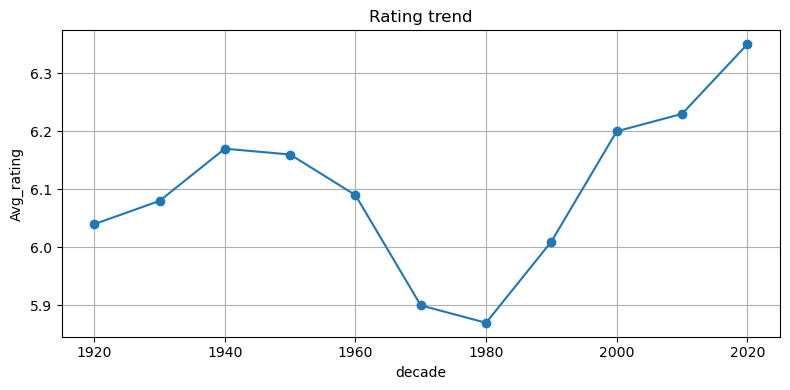

In [102]:
plt.figure(figsize=(8,4))
plt.plot(df['decade'], df['avg_rating'], marker='o')
plt.xlabel('decade')
plt.ylabel('Avg_rating')
plt.title('Rating trend')
plt.grid(True)
plt.tight_layout()
plt.show()

How do ratings change for movies as they age?随着电影年龄的增长，它们的评分如何变化？

In [105]:
query = """
SELECT
  EXTRACT(YEAR FROM CURRENT_DATE()) - SAFE_CAST(tb.start_year AS INT64) AS age,
  ROUND(AVG(tr.average_rating), 2) AS avg_rating,
  COUNT(1) AS movie_count
FROM `gothic-well-464310-i6.imdb.title_basics` AS tb
JOIN `gothic-well-464310-i6.imdb.title_ratings` AS tr
  ON tb.tconst = tr.tconst
WHERE
  tb.title_type = 'movie'
  AND SAFE_CAST(tb.start_year AS INT64) IS NOT NULL
GROUP BY
  age
ORDER BY
  age
"""

df = client.query(query).to_dataframe()

print(df.head())

   age  avg_rating  movie_count
0    0        6.85         3815
1    1        6.49        10458
2    2        6.35        11278
3    3        6.33        11292
4    4        6.22         9627


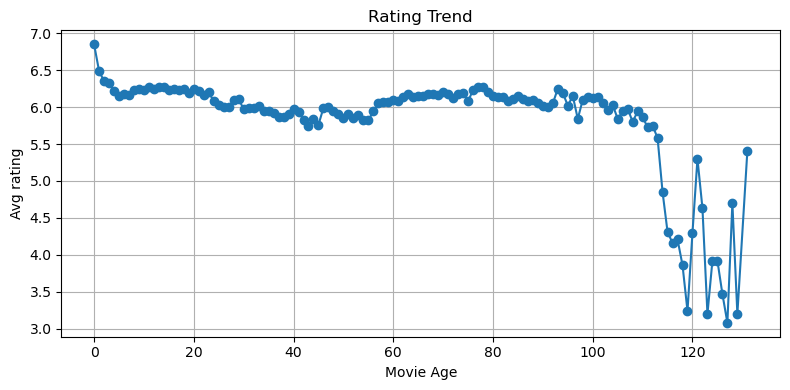

In [106]:
plt.figure(figsize=(8, 4))
plt.plot(df['age'], df['avg_rating'], marker='o')
plt.xlabel('Movie Age')
plt.ylabel('Avg rating')
plt.title('Rating Trend')
plt.grid(True)
plt.tight_layout()
plt.show()

Regional or Cultural Insights

What are the most popular non-English movies by rating?按评分排序，最受欢迎的非英语电影有哪些？

In [116]:

query = """
SELECT
  *
FROM `gothic-well-464310-i6.imdb.title_akas`
LIMIT 1000
"""

# 执行并转成 DataFrame
df_sample = client.query(query).to_dataframe()

# 直接打印
print(df_sample)

# pd.set_option('display.max_colwidth', None)
# print(df_sample['language'])

# unique_langs = df_sample['language'].dropna().unique()

# # 直接打印数组
# print(unique_langs)

# # 或者按行打印，更易读
# for lang in sorted(unique_langs):
#     print(lang)

       title_id  ordering  \
0    tt30609305         1   
1    tt30688949         1   
2    tt30695498         1   
3    tt30710044         1   
4    tt30751202         1   
..          ...       ...   
995  tt29345725         1   
996   tt2936312         1   
997  tt29370174         1   
998  tt29374094         1   
999   tt2938602         1   

                                                                          title  \
0                                      Abstimmungs-Arena: Stipendien-Initiative   
1                                                                Episode #1.381   
2                                                Episode dated 20 December 2023   
3                                                Episode dated 13 February 1990   
4                                                       Casa Automática em 360°   
..                                                                          ...   
995                                     The Slaughter Creek Slasher of

In [119]:
query = """
SELECT
  tb.primary_title    AS title,       -- 电影名
  tr.average_rating   AS rating,      -- 平均评分
  tr.num_votes        AS votes,       -- 投票数
FROM `gothic-well-464310-i6.imdb.title_akas`    AS ta
JOIN `gothic-well-464310-i6.imdb.title_basics`  AS tb
  ON ta.title_id = tb.tconst
JOIN `gothic-well-464310-i6.imdb.title_ratings` AS tr
  ON tb.tconst = tr.tconst
WHERE
  -- 只看原始标题且是电影
  ta.is_original_title = TRUE
  AND tb.title_type = 'movie'
  AND (
       -- 语言不是英語
       UPPER(ta.language) NOT IN ('EN')
    OR -- 地区不是英语市场
       ta.region NOT IN ('US','GB','UK','CA','AU','NZ')
    OR -- 标题包含非 ASCII 字符
       REGEXP_CONTAINS(tb.primary_title, r'[^\\x00-\\x7F]')
    OR -- 标题中多字节字符占用空间大于字符数
       CHAR_LENGTH(tb.primary_title) < BYTE_LENGTH(tb.primary_title)
  )
ORDER BY
  tr.average_rating DESC,  -- 按评分降序
  tr.num_votes DESC         -- 同分时按投票数降序
LIMIT 10
"""

# 执行查询并转成 DataFrame
df_non_english = client.query(query).to_dataframe()

# 打印结果
print("评分最高的前 10 部“原版非英语”电影：")
print(df_non_english)

评分最高的前 10 部“原版非英语”电影：
                                                 title  rating  votes
0                                 Mensch, ärgere dich!    10.0      6
1               Mamá quiero ser futbolista profesional    10.0      5
2                      Days of Géants 3: Dani Divova 3     9.8     63
3  13 Lentes De Um Final Feliz (Documentário Completo)     9.8     45
4                    Rutas del más allá: El documental     9.8     29
5             Islande, Sur les Traces de la Démocratie     9.8     15
6               Au-delà de 120 ans avec Jeanne Calment     9.8      9
7                                Héroes de Chapultepec     9.8      8
8                                                Griôs     9.8      8
9                                   The Spirit of Tatá     9.8      6


Which countries produce the most highly-rated movies in a specific genre?


在特定类型中，哪些国家制作了最多高评分的电影？

In [123]:
query = """
SELECT
  COALESCE(ta.region, ta.language) AS country,  -- 如果 region 为空，就用 language
  COUNT(*)                          AS high_rated_count
FROM `gothic-well-464310-i6.imdb.title_akas`   AS ta
JOIN `gothic-well-464310-i6.imdb.title_basics` AS tb
  ON ta.title_id = tb.tconst
JOIN `gothic-well-464310-i6.imdb.title_ratings` AS tr
  ON tb.tconst = tr.tconst
WHERE
  tb.title_type = 'movie'
  AND 'Comedy' IN UNNEST(SPLIT(tb.genres, ','))
  AND tr.average_rating >= 9.0
  -- 不做 region IS NOT NULL 过滤
GROUP BY
  country
ORDER BY
  high_rated_count DESC
LIMIT 10
"""

df_countries = client.query(query).to_dataframe()
print("在 Comedy 类型中，IMDb 平均评分 ≥ 9 的前 10 个制作国家：")
print(df_countries)

在 Comedy 类型中，IMDb 平均评分 ≥ 9 的前 10 个制作国家：
  country  high_rated_count
0    None               537
1      US               255
2      IN               158
3      GB               100
4      CA                55
5      DE                27
6      AU                25
7     XWW                21
8      PH                16
9      MX                12


Crew Collaboration Analysis

Which actor-director pairings produce the highest-rated movies?哪些演员–导演组合制作了评分最高的电影？

In [124]:
query = """
SELECT
  dir_nb.primary_name    AS director,
  act_nb.primary_name    AS actor,
  ROUND(AVG(tr.average_rating), 2) AS avg_rating,
  COUNT(*)                        AS collaborations
FROM `gothic-well-464310-i6.imdb.title_basics`   AS tb
JOIN `gothic-well-464310-i6.imdb.title_ratings`  AS tr
  ON tb.tconst = tr.tconst
JOIN `gothic-well-464310-i6.imdb.title_crew`     AS tc
  ON tb.tconst = tc.tconst
CROSS JOIN UNNEST(SPLIT(tc.directors, ','))       AS director_nconst
JOIN `gothic-well-464310-i6.imdb.name_basics`    AS dir_nb
  ON dir_nb.nconst = director_nconst
JOIN `gothic-well-464310-i6.imdb.title_principals` AS tp
  ON tp.tconst = tb.tconst AND tp.category IN ('actor','actress')
JOIN `gothic-well-464310-i6.imdb.name_basics`    AS act_nb
  ON act_nb.nconst = tp.nconst
WHERE
  tb.title_type = 'movie'
GROUP BY
  director, actor
HAVING
  collaborations >= 3
ORDER BY
  avg_rating DESC,
  collaborations DESC
LIMIT 10
"""

# 执行并展示结果
df_pairs = client.query(query).to_dataframe()
print("评分最高的前 10 个演员–导演组合：")
print(df_pairs)

评分最高的前 10 个演员–导演组合：
           director                  actor  avg_rating  collaborations
0        Ty M. Levy     William J.N. Bryan        10.0               3
1        Ty M. Levy             Ty M. Levy        10.0               3
2  Kathryn Johnston            Magicofwolf         9.9               3
3     Artie Brennan          Artie Brennan         9.8               3
4    Cara Consilvio  Brent Nicholson Earle         9.8               3
5  Anthony Giordano          Artie Brennan         9.8               3
6     Artie Brennan       Anthony Giordano         9.8               3
7  Anthony Giordano       Anthony Giordano         9.8               3
8    Vikram Benipal          James Zhao Lu         9.7               3
9    Daniel Fissmer         Daniel Fissmer         9.7               3


Who are the most frequent collaborators in a specific genre?

In [126]:
#原本只打算以comedy为例来写 后来想把每一个genre的第一个都打印出来
query = """
SELECT
  genre,
  a1.primary_name   AS actor1,
  a2.primary_name   AS actor2,
  COUNT(*)          AS collaborations
FROM `gothic-well-464310-i6.imdb.title_basics` AS tb
CROSS JOIN UNNEST(SPLIT(tb.genres, ','))       AS genre
JOIN `gothic-well-464310-i6.imdb.title_principals` AS tp1
  ON tp1.tconst = tb.tconst AND tp1.category IN ('actor','actress')
JOIN `gothic-well-464310-i6.imdb.name_basics`      AS a1
  ON a1.nconst = tp1.nconst
JOIN `gothic-well-464310-i6.imdb.title_principals` AS tp2
  ON tp2.tconst = tb.tconst 
    AND tp2.category IN ('actor','actress') 
    AND tp2.nconst > tp1.nconst
JOIN `gothic-well-464310-i6.imdb.name_basics`      AS a2
  ON a2.nconst = tp2.nconst
WHERE
  tb.title_type = 'movie'
GROUP BY
  genre, a1.primary_name, a2.primary_name
QUALIFY
  ROW_NUMBER() OVER (
    PARTITION BY genre 
    ORDER BY collaborations DESC
  ) = 1
ORDER BY
  genre
"""

df = client.query(query).to_dataframe()
print("每个类型中合作最频繁的演员组合：")
print(df)

每个类型中合作最频繁的演员组合：
          genre               actor1              actor2  collaborations
0        Action          Eric Stuart     Veronica Taylor             164
1         Adult            Tom Byron        Marc Wallice              71
2     Adventure          Eric Stuart     Veronica Taylor             164
3     Animation          Eric Stuart     Veronica Taylor             164
4     Biography        Richard Epcar     Barbara Goodson              16
5        Comedy             Panchito              Dolphy             119
6         Crime          Luis Huizar       Vianey Huizar              46
7   Documentary          Jason Young           Ann Waugh              46
8         Drama      Smiley Burnette    Charles Starrett             101
9        Family           Simon Hill      Kelsey Painter              74
10      Fantasy           Jan Rabson     Richard Rossner              36
11    Film-Noir           Tom Conway         Jean Brooks               6
12    Game-Show         Ross Gilbe

Do sequels generally perform better or worse than the original movie? 续集和原来的比 好坏

In [131]:
query = """
WITH movies AS (
  SELECT 
    tb.tconst,
    tb.primary_title,
    tr.average_rating
  FROM `gothic-well-464310-i6.imdb.title_basics` AS tb
  JOIN `gothic-well-464310-i6.imdb.title_ratings` AS tr
    ON tb.tconst = tr.tconst
  WHERE tb.title_type = 'movie'
),
franchises AS (
  SELECT
    m.*,
    -- 简单判断：片名里带 2 或 II 视为续集，否则视为原作
    IF(
      REGEXP_CONTAINS(m.primary_title, r'(?i)(?:\\b2\\b|II)'),
      'sequel',
      'original'
    ) AS is_sequel,
    -- 抽取基础片名（去掉 “: 2”、" II" 等后缀）
    IF(
      REGEXP_CONTAINS(m.primary_title, r'(?i)^(.*?)(?:(?:[: ](?:\\b[2-9]\\b|I{2,}))$)'),
      REGEXP_EXTRACT(m.primary_title, r'(?i)^(.*?)(?:(?:[: ](?:\\b[2-9]\\b|I{2,}))$)'),
      m.primary_title
    ) AS base_title
  FROM movies AS m
),
stats AS (
  SELECT
    base_title,
    MAX(CASE WHEN is_sequel = 'original' THEN average_rating END) AS orig_rating,
    AVG(CASE WHEN is_sequel = 'sequel'  THEN average_rating END) AS seq_avg_rating
  FROM franchises
  GROUP BY base_title
)
SELECT
  COUNTIF(seq_avg_rating > orig_rating)                           AS num_sequels_better,
  COUNTIF(seq_avg_rating <= orig_rating)                          AS num_sequels_worse,
  COUNT(*)                                                        AS num_franchises,
  ROUND(COUNTIF(seq_avg_rating > orig_rating)/COUNT(*)*100, 2)   AS pct_sequels_better,
  ROUND(COUNTIF(seq_avg_rating <= orig_rating)/COUNT(*)*100, 2)  AS pct_sequels_worse
FROM stats;
"""

df = client.query(query).to_dataframe()
print(df)

   num_sequels_better  num_sequels_worse  num_franchises  pct_sequels_better  \
0                 391               1186          291724                0.13   

   pct_sequels_worse  
0               0.41  


In [132]:
row = df.iloc[0]

# 计算持平的系列数
num_better   = int(row["num_sequels_better"])
num_worse    = int(row["num_sequels_worse"])
num_total    = int(row["num_franchises"])
num_equal    = num_total - num_better - num_worse

# 输出结果
print(f"总电影系列数: {num_total}")
print(f"续集表现更好: {num_better}")
print(f"续集表现更差: {num_worse}")
print(f"续集表现持平: {num_equal}")

总电影系列数: 291724
续集表现更好: 391
续集表现更差: 1186
续集表现持平: 290147


Which franchises have the highest average ratings across their movies?

In [133]:
query = """
WITH movies AS (
  SELECT
    tb.tconst,
    tb.primary_title,
    tr.average_rating
  FROM `gothic-well-464310-i6.imdb.title_basics` AS tb
  JOIN `gothic-well-464310-i6.imdb.title_ratings` AS tr
    ON tb.tconst = tr.tconst
  WHERE tb.title_type = 'movie'
),
franchises AS (
  SELECT
    m.*,
    -- 判断是否为续集
    IF(
      REGEXP_CONTAINS(m.primary_title, r'(?i)(?:\\b2\\b|II|III|IV|V)'),
      'sequel',
      'original'
    ) AS is_sequel,
    -- 提取系列基础名称（去掉 “ 2”、“ II”等）
    IF(
      REGEXP_CONTAINS(m.primary_title, r'(?i)^(.*?)(?:[: ](?:\\b[2-9]\\b|I{2,}))$'),
      REGEXP_EXTRACT(m.primary_title, r'(?i)^(.*?)(?:(?:[: ](?:\\b[2-9]\\b|I{2,}))$)'),
      m.primary_title
    ) AS series_name
  FROM movies AS m
),
series_stats AS (
  SELECT
    series_name,
    ROUND(AVG(average_rating), 2) AS avg_series_rating,
    COUNT(*)                   AS num_movies
  FROM franchises
  GROUP BY series_name
  HAVING num_movies > 1         -- 只看至少包含两个电影的系列
)
SELECT
  series_name,
  avg_series_rating,
  num_movies
FROM series_stats
ORDER BY avg_series_rating DESC
LIMIT 10
"""

# 执行查询并转为 DataFrame
df_top_series = client.query(query).to_dataframe()

# 打印结果
print("平均评分最高的前 10 个电影系列：")
print(df_top_series)

平均评分最高的前 10 个电影系列：
                               series_name  avg_series_rating  num_movies
0                              Chauranghee               9.40           2
1                           Arctic Odyssey               9.40           2
2                   Christy Canyon X-Posed               9.37           3
3                         Donde Tú Quieras               9.25           2
4                      The Wonderful Digby               9.25           2
5                                 Concerto               9.20           2
6                                    Parto               9.17           3
7  Under the Radar: The Mike Edmonds Story               9.10           2
8                         Food for Thought               9.10           2
9                                Ephemeral               9.10           2


Career Trajectory of Artists

How does an actor’s average movie rating evolve throughout their career?

In [136]:
query = """
SELECT
  SAFE_CAST(tb.start_year AS INT64) AS year,
  ROUND(AVG(tr.average_rating), 2)   AS avg_rating,
  COUNT(*)                           AS film_count
FROM `gothic-well-464310-i6.imdb.title_principals` AS tp
JOIN `gothic-well-464310-i6.imdb.name_basics`    AS nb
  ON tp.nconst = nb.nconst
JOIN `gothic-well-464310-i6.imdb.title_basics`   AS tb
  ON tp.tconst = tb.tconst
JOIN `gothic-well-464310-i6.imdb.title_ratings`  AS tr
  ON tb.tconst = tr.tconst
WHERE
  tp.category    IN ('actor','actress')
  AND nb.primary_name = 'Leonardo DiCaprio'
  AND tb.title_type   = 'movie'
  AND SAFE_CAST(tb.start_year AS INT64) IS NOT NULL
GROUP BY
  year
ORDER BY
  year
"""
df = client.query(query).to_dataframe()
print(df)

    year  avg_rating  film_count
0   1991        4.50           1
1   1992        5.40           1
2   1993        7.50           2
3   1995        6.73           3
4   1996        6.70           2
5   1997        7.90           1
6   1998        6.43           3
7   2000        6.60           1
8   2001        5.50           1
9   2002        7.80           2
10  2004        7.50           1
11  2006        8.25           2
12  2008        7.15           2
13  2010        8.20           3
14  2011        6.50           1
15  2012        8.50           1
16  2013        7.70           2
17  2015        8.00           1
18  2019        7.50           2
19  2021        7.20           1
20  2023        7.60           1


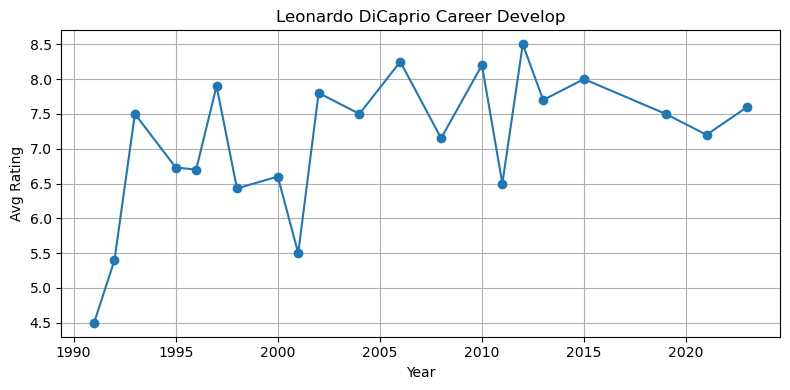

In [138]:
plt.figure(figsize=(8, 4))
plt.plot(df['year'], df['avg_rating'], marker='o')
plt.title(f"{ACTOR_NAME} Career Develop")
plt.xlabel('Year')
plt.ylabel('Avg Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

Which directors improved their ratings over the years?

In [139]:
query = """
WITH dir_movies AS (
  SELECT
    d AS director_id,
    SAFE_CAST(tb.start_year AS INT64) AS year,
    tr.average_rating               AS rating
  FROM `gothic-well-464310-i6.imdb.title_crew` AS tc
  CROSS JOIN UNNEST(SPLIT(tc.directors, ',')) AS d
  JOIN `gothic-well-464310-i6.imdb.title_basics` AS tb
    ON tc.tconst = tb.tconst
  JOIN `gothic-well-464310-i6.imdb.title_ratings` AS tr
    ON tc.tconst = tr.tconst
  WHERE
    tb.title_type = 'movie'
    AND SAFE_CAST(tb.start_year AS INT64) IS NOT NULL
),
dir_stats AS (
  SELECT
    director_id,
    (ARRAY_AGG(STRUCT(year, rating) ORDER BY year ASC LIMIT 1))[OFFSET(0)].rating AS first_rating,
    (ARRAY_AGG(STRUCT(year, rating) ORDER BY year DESC LIMIT 1))[OFFSET(0)].rating AS last_rating
  FROM dir_movies
  GROUP BY director_id
)
SELECT
  nb.primary_name          AS director_name,
  ROUND(ds.first_rating,2) AS first_rating,
  ROUND(ds.last_rating,2)  AS last_rating,
  ROUND(ds.last_rating - ds.first_rating,2) AS rating_improvement
FROM dir_stats AS ds
JOIN `gothic-well-464310-i6.imdb.name_basics` AS nb
  ON ds.director_id = nb.nconst
WHERE ds.last_rating > ds.first_rating
ORDER BY rating_improvement DESC
LIMIT 10
"""

df = client.query(query).to_dataframe()
print("评分随着时间提升最明显的前 10 位导演：")
print(df)

评分随着时间提升最明显的前 10 位导演：
           director_name  first_rating  last_rating  rating_improvement
0      Aleksey Panteleev           1.2          9.4                 8.2
1          Jastis Arimba           1.2          9.2                 8.0
2        Vitaliy Versace           1.4          9.1                 7.7
3            Jojo George           1.5          9.2                 7.7
4  R. Christian Anderson           1.6          9.0                 7.4
5          Hristos Godas           1.0          8.4                 7.4
6      Michael A. Calace           1.6          8.9                 7.3
7         Adebayo Tijani           1.5          8.7                 7.2
8          Matey Genchev           1.0          8.0                 7.0
9         Michael Merino           3.1         10.0                 6.9
